In [1]:
!pip install ijson

     |████████████████████████████████| 133kB 5.3MB/s 


In [238]:
import numpy as np
import pandas as pd
import ijson
from pandas.io.json import json_normalize
import seaborn as sns
from statistics import *
from statistics import stdev
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm
plt.rcParams['figure.figsize'] = (20, 10)
sb.set_style('whitegrid')


In [239]:
 # read in data
import pandas as pd
df = pd.read_json("test.jsonl",
                        lines=True,
                        orient='columns')
print(df.shape)

df = df[df['agent_category'] != 'UNKNOWN']
df = df[df['agent_os'] != 'UNKNOWN']
df = df[df['referer'] != 'UNKNOWN']
df = df[df['agent_name'] != 'UNKNOWN']


df[:4]


(3857, 21)


,remote,host,user,method,code,size,referer,http_x_forwarded_for,ua,created,agent_name,agent_category,agent_os,referer_known,uri,hostname,uri_url_hash,injected,enrich,event_tag,time
0,62.308.59.153,-,-,GET,200,43,https://www.ecodibergamo.it/,155.380.27.200,"{'browser': {'family': 'Chrome', 'version': '78.0.3904.87', 'major_version': 78}, 'os': {'family': 'Windows', 'version': '10', 'major_version': 10}, 'device': 'Other'}",2019-11-08T00:00:00.000000000Z,Chrome,pc,Windows 10,False,"{'stm': '1573171199218', 'e': 'pv', 'url': 'https://www.ecodibergamo.it/', 'page': 'L'Eco di Bergamo - Notizie di Bergamo e provincia', 'refr': 'https://www.ecodibergamo.it/', 'tv': 'js-2.11.0', 'tna': 'cf', 'aid': 'SB-de77ae02-a351-11e7-879c-28cfe91d3e21', 'p': 'web', 'tz': 'Europe/Berlin', 'lang': 'it-IT', 'cs': 'UTF-8', 'f_pdf': '1', 'f_qt': '0', 'f_realp': '0', 'f_wma': '0', 'f_dir': '0', 'f_fla': '0', 'f_java': '0', 'f_gears': '0', 'f_ag': '0', 'res': '1280x720', 'cd': '24', 'cookie': '1', 'eid': 'fee489a9-c110-42b8-b997-ab50ddb1e912', 'dtm': '1573171199215', 'vp': '1280x616', 'ds': '1263x6725', 'vid': '2', 'sid': 'a3b7e1b0-6192-46ee-8f6b-e258fc2811ab', 'duid': '0c2841a0-ea61-445e-973e-607ea1123333', 'fp': '4272995877'}",7c6c8781197c,7e452fb177e15e229756b1fff4a6f5bc,"{'user': {'id': 'NDc5MjkwNTAwMDBwMG95aGRmMDlzbXN2aW10eWdtM3p0ZjBrMHl0ZTZycg==_test', 'profile': {'type': 'anonymous'}}}",{},53248f1721ee,2019-11-08T00:00:00Z
1,356.6.121.291,-,-,GET,200,43,https://www.ecodibergamo.it/,224.80.19.283,"{'browser': {'family': 'Firefox', 'version': '70.0', 'major_version': 70}, 'os': {'family': 'Windows', 'version': '10', 'major_version': 10}, 'device': 'Other'}",2019-11-08T00:00:02.000000000Z,Firefox,pc,Windows 10,False,"{'stm': '1573171202942', 'e': 'pv', 'url': 'https://www.ecodibergamo.it/', 'page': 'L'Eco di Bergamo - Notizie di Bergamo e provincia', 'tv': 'js-2.11.0', 'tna': 'cf', 'aid': 'SB-de77ae02-a351-11e7-879c-28cfe91d3e21', 'p': 'web', 'tz': 'Europe/Berlin', 'lang': 'it-IT', 'cs': 'UTF-8', 'f_pdf': '0', 'f_qt': '0', 'f_realp': '0', 'f_wma': '0', 'f_dir': '0', 'f_fla': '1', 'f_java': '0', 'f_gears': '0', 'f_ag': '0', 'res': '1680x1050', 'cd': '24', 'cookie': '1', 'eid': '52273f46-75ac-45d6-ad2b-26e8769ed3bf', 'dtm': '1573171202940', 'vp': '1680x908', 'ds': '1663x6737', 'vid': '1', 'sid': 'f35632aa-982f-4342-a86f-736d56b20797', 'duid': 'e7067c56-383b-4559-840f-70c193d3adf8', 'fp': '3175553694'}",7c6c8781197c,7e452fb177e15e229756b1fff4a6f5bc,"{'user': {'id': 'MjM2NzkxNjI4MTB0d2l6MWk1MXA1Mng4cXVvMm9ybHFjcXNtbGVya3VnNw==_test', 'profile': {'type': 'anonymous'}}}",{},53248f1721ee,2019-11-08T00:00:02Z
2,130.216.19.309,-,-,GET,200,43,https://www.ecodibergamo.it/stories/bergamo-citta/bergamo-nellolimpo-della-guida-rossada-vittorio-al-top-new-entry-impronte_1327138_11/,373.198.78.13,"{'browser': {'family': 'Chrome', 'version': '77.0.3865.116', 'major_version': 77}, 'os': {'family': 'Android', 'version': '4.4.4', 'major_version': 4}, 'device': 'Generic Smartphone'}",2019-11-08T00:00:02.000000000Z,Chrome,smartphone,Android,False,"{'stm': '1573171290396', 'e': 'pv', 'url': 'https://www.ecodibergamo.it/stories/bergamo-citta/bergamo-nellolimpo-della-guida-rossada-vittorio-al-top-new-entry-impronte_1327138_11/', 'page': 'Bergamo nell’Olimpo della Guida Rossa «Vittorio» al top, new entry «Impronte» - Bergamo città Bergamo', 'refr': 'android-app://com.google.android.googlequicksearchbox/https/www.google.com', 'tv': 'js-2.11.0', 'tna': 'cf', 'aid': 'SB-de77ae02-a351-11e7-879c-28cfe91d3e21', 'p': 'web', 'tz': 'Europe/Berlin', 'lang': 'it', 'cs': 'UTF-8', 'res': '800x1280', 'cd': '24', 'cookie': '1', 'eid': 'fc855c89-daf3-4c54-b0bf-06d7f41df16d', 'dtm': '1573171290376', 'vp': '800x1191', 'ds': '800x6819', 'vid': '1', 'sid': '473338c8-c941-48e2-8483-ec46e06e2728', 'duid': 'b2937acc-a384-4909-90b8-b5b4ce061e52', 'fp': '1935601176'}",7c6c8781197c,3555294575be3f0cf6e0e2b50e5be1e5,"{'user': {'id': 'NDkyMTgwMzk1MDh2c29vdzNpOW1xd2l4aWx6YmhramY0Z3l5eDdoOGJsYQ==_test', 'pr

In [240]:
print('The shape of our features is:', df.shape)
df=df.replace(np.nan,0)

The shape of our features is: (3688, 21)


In [241]:
df.isnull().sum()

remote                  0
host                    0
user                    0
method                  0
code                    0
size                    0
referer                 0
http_x_forwarded_for    0
ua                      0
created                 0
agent_name              0
agent_category          0
agent_os                0
referer_known           0
uri                     0
hostname                0
uri_url_hash            0
injected                0
enrich                  0
event_tag               0
time                    0
dtype: int64

In [242]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
df1=df.copy() 
df["agent_os_new"] = label_encoder.fit_transform(df["agent_os"]).astype('float64')
df["agent_category_new"] = label_encoder.fit_transform(df["agent_category"]).astype('float64')
df["referer_new"] = label_encoder.fit_transform(df["referer"]).astype('float64')
df["agent_name_new"] = label_encoder.fit_transform(df["agent_name"]).astype('float64')

pd.set_option('display.max_colwidth', -1)

df.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':


,remote,host,user,method,code,size,referer,http_x_forwarded_for,ua,created,agent_name,agent_category,agent_os,referer_known,uri,hostname,uri_url_hash,injected,enrich,event_tag,time,agent_os_new,agent_category_new,referer_new,agent_name_new
0,62.308.59.153,-,-,GET,200,43,https://www.ecodibergamo.it/,155.380.27.200,"{'browser': {'family': 'Chrome', 'version': '78.0.3904.87', 'major_version': 78}, 'os': {'family': 'Windows', 'version': '10', 'major_version': 10}, 'device': 'Other'}",2019-11-08T00:00:00.000000000Z,Chrome,pc,Windows 10,False,"{'stm': '1573171199218', 'e': 'pv', 'url': 'https://www.ecodibergamo.it/', 'page': 'L'Eco di Bergamo - Notizie di Bergamo e provincia', 'refr': 'https://www.ecodibergamo.it/', 'tv': 'js-2.11.0', 'tna': 'cf', 'aid': 'SB-de77ae02-a351-11e7-879c-28cfe91d3e21', 'p': 'web', 'tz': 'Europe/Berlin', 'lang': 'it-IT', 'cs': 'UTF-8', 'f_pdf': '1', 'f_qt': '0', 'f_realp': '0', 'f_wma': '0', 'f_dir': '0', 'f_fla': '0', 'f_java': '0', 'f_gears': '0', 'f_ag': '0', 'res': '1280x720', 'cd': '24', 'cookie': '1', 'eid': 'fee489a9-c110-42b8-b997-ab50ddb1e912', 'dtm': '1573171199215', 'vp': '1280x616', 'ds': '1263x6725', 'vid': '2', 'sid': 'a3b7e1b0-6192-46ee-8f6b-e258fc2811ab', 'duid': '0c2841a0-ea61-445e-973e-607ea1123333', 'fp': '4272995877'}",7c6c8781197c,7e452fb177e15e229756b1fff4a6f5bc,"{'user': {'id': 'NDc5MjkwNTAwMDBwMG95aGRmMDlzbXN2aW10eWdtM3p0ZjBrMHl0ZTZycg==_test', 'profile': {'type': 'anonymous'}}}",{},53248f1721ee,2019-11-08T00:00:00Z,3.0,0.0,1.0,0.0


In [243]:
len(df['time'].unique())

1892

In [244]:
print(df['size'].unique())
print(df['code'].unique())
#print(df['referer'].unique())
#print(df['ua'].unique())
print(df['agent_name'].unique())
print(df['agent_os'].unique())
print(df['agent_category'].unique())
df['month'] = pd.DatetimeIndex(df['time']).month
df['weekday'] = pd.DatetimeIndex(df['time']).weekday
df
print(df['month'].unique())
print(df['weekday'].unique())




[43]
[200]
['Chrome' 'Firefox' 'Edge' 'Safari' 'Opera' 'Internet Explorer' 'Webview'
 'Yandex Browser']
['Windows 10' 'Android' 'Windows 7' 'iPhone' 'Mac OSX' 'iPad' 'Linux'
 'Windows XP' 'Windows Phone OS' 'Windows 8.1' 'Windows 8']
['pc' 'smartphone']
[11]
[4]


In [245]:
Counts = df.agent_category.value_counts()
print("-------Frequency counts for Department column-------\n",Counts)
print(type(Counts))

Counts = df.agent_os.value_counts()
print("-------Frequency counts for Department column-------\n",Counts)
print(type(Counts))

-------Frequency counts for Department column-------
 smartphone    2515
pc            1173
Name: agent_category, dtype: int64
<class 'pandas.core.series.Series'>
-------Frequency counts for Department column-------
 Android             1798
Windows 10          540 
iPhone              529 
Windows 7           328 
Mac OSX             226 
iPad                175 
Windows 8.1         44  
Linux               19  
Windows Phone OS    13  
Windows XP          10  
Windows 8           6   
Name: agent_os, dtype: int64
<class 'pandas.core.series.Series'>


In [246]:
my_string="https://www.ecodibergamo.it/stories/Cronaca/"
print(my_string.split("https://www.ecodibergamo.it/",1)[1] )

stories/Cronaca/


In [247]:
def replace_urls(url):
    if url == 'https://www.ecodibergamo.it/':
        url = 'website'
    else:
        url = '/'.join(re.sub('https://www.ecodibergamo.it/', '', url).split('/')[:2])
    return url

In [248]:
import re
df['URL'] = [replace_urls(i) for i in df['referer']]

In [181]:
df= df[["agent_os","agent_name","agent_category","URL","agent_os_new","agent_category_new","referer_new","agent_name_new"]]

In [249]:
print (len(df['URL'].unique()))
print (len(df['agent_os'].unique()))
print ((len(df['agent_category'].unique())))
print (len(df['agent_name'].unique()))


68
11
2
8


In [250]:
XX = df [["agent_os_new","agent_category_new","referer_new","agent_name_new"]]

y = df['referer_new']
y
cols = XX.columns

In [185]:
X[:4]

,agent_os_new,agent_category_new,referer_new,agent_name_new
0,0.3,0.0,0.002817,0.000000
1,0.3,0.0,0.002817,0.285714
2,0.0,1.0,0.526761,0.000000
3,0.4,0.0,0.459155,0.000000


In [251]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(XX)

X = pd.DataFrame(X, columns=[cols])
X[:4]

,agent_os_new,agent_category_new,referer_new,agent_name_new
0,0.3,0.0,0.002817,0.000000
1,0.3,0.0,0.002817,0.285714
2,0.0,1.0,0.526761,0.000000
3,0.4,0.0,0.459155,0.000000


In [252]:
#K-Means model with n clusters 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0) 

ymeans = kmeans.fit(X)
y_kmeans = kmeans.predict(X)

ymeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [253]:
y_kmeans

array([1, 1, 0, ..., 3, 3, 1], dtype=int32)

In [254]:
kmeans.cluster_centers_

array([[ 1.11464968e-03,  1.00000000e+00,  6.77240513e-01,
         2.25887170e-01],
       [ 3.21994885e-01, -2.04281037e-14,  7.96080833e-02,
         1.65266106e-01],
       [ 6.10622664e-16,  1.00000000e+00,  7.14473004e-02,
         2.75710626e-02],
       [ 9.70530726e-01,  1.00000000e+00,  3.13478637e-01,
         6.94533121e-01]])

In [255]:
kmeans.inertia_

370.60679764943495

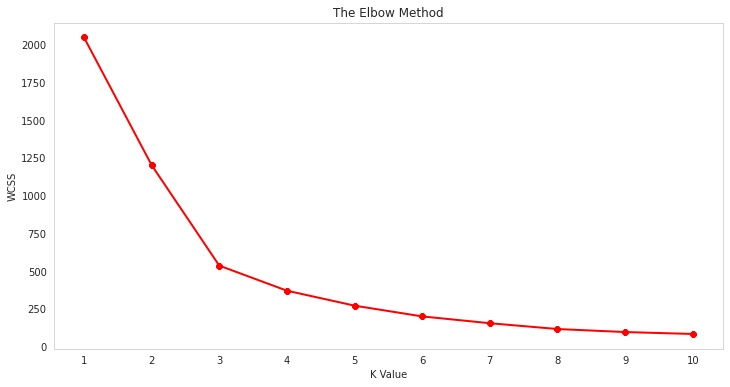

In [256]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    k_means = KMeans(n_clusters=k, init="k-means++")
    k_means.fit(X)
    wcss.append(k_means.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.title('The Elbow Method')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [257]:
labels = kmeans.labels_
labels


array([1, 1, 0, ..., 3, 3, 1], dtype=int32)

The optimal K value is found to be 5 using the elbow method.


In [258]:
labels = kmeans.labels_
df['cluster_num'] = labels
df.head()



,remote,host,user,method,code,size,referer,http_x_forwarded_for,ua,created,agent_name,agent_category,agent_os,referer_known,uri,hostname,uri_url_hash,injected,enrich,event_tag,time,agent_os_new,agent_category_new,referer_new,agent_name_new,month,weekday,URL,cluster_num
0,62.308.59.153,-,-,GET,200,43,https://www.ecodibergamo.it/,155.380.27.200,"{'browser': {'family': 'Chrome', 'version': '78.0.3904.87', 'major_version': 78}, 'os': {'family': 'Windows', 'version': '10', 'major_version': 10}, 'device': 'Other'}",2019-11-08T00:00:00.000000000Z,Chrome,pc,Windows 10,False,"{'stm': '1573171199218', 'e': 'pv', 'url': 'https://www.ecodibergamo.it/', 'page': 'L'Eco di Bergamo - Notizie di Bergamo e provincia', 'refr': 'https://www.ecodibergamo.it/', 'tv': 'js-2.11.0', 'tna': 'cf', 'aid': 'SB-de77ae02-a351-11e7-879c-28cfe91d3e21', 'p': 'web', 'tz': 'Europe/Berlin', 'lang': 'it-IT', 'cs': 'UTF-8', 'f_pdf': '1', 'f_qt': '0', 'f_realp': '0', 'f_wma': '0', 'f_dir': '0', 'f_fla': '0', 'f_java': '0', 'f_gears': '0', 'f_ag': '0', 'res': '1280x720', 'cd': '24', 'cookie': '1', 'eid': 'fee489a9-c110-42b8-b997-ab50ddb1e912', 'dtm': '1573171199215', 'vp': '1280x616', 'ds': '1263x6725', 'vid': '2', 'sid': 'a3b7e1b0-6192-46ee-8f6b-e258fc2811ab', 'duid': '0c2841a0-ea61-445e-973e-607ea1123333', 'fp': '4272995877'}",7c6c8781197c,7e452fb177e15e229756b1fff4a6f5bc,"{'user': {'id': 'NDc5MjkwNTAwMDBwMG95aGRmMDlzbXN2aW10eWdtM3p0ZjBrMHl0ZTZycg==_test', 'profile': {'type': 'anonymous'}}}",{},53248f1721ee,2019-11-08T00:00:00Z,3.0,0.0,1.0,0.0,11,4,website,1
1,356.6.121.291,-,-,GET,200,43,https://www.ecodibergamo.it/,224.80.19.283,"{'browser': {'family': 'Firefox', 'version': '70.0', 'major_version': 70}, 'os': {'family': 'Windows', 'version': '10', 'major_version': 10}, 'device': 'Other'}",2019-11-08T00:00:02.000000000Z,Firefox,pc,Windows 10,False,"{'stm': '1573171202942', 'e': 'pv', 'url': 'https://www.ecodibergamo.it/', 'page': 'L'Eco di Bergamo - Notizie di Bergamo e provincia', 'tv': 'js-2.11.0', 'tna': 'cf', 'aid': 'SB-de77ae02-a351-11e7-879c-28cfe91d3e21', 'p': 'web', 'tz': 'Europe/Berlin', 'lang': 'it-IT', 'cs': 'UTF-8', 'f_pdf': '0', 'f_qt': '0', 'f_realp': '0', 'f_wma': '0', 'f_dir': '0', 'f_fla': '1', 'f_java': '0', 'f_gears': '0', 'f_ag': '0', 'res': '1680x1050', 'cd': '24', 'cookie': '1', 'eid': '52273f46-75ac-45d6-ad2b-26e8769ed3bf', 'dtm': '1573171202940', 'vp': '1680x908', 'ds': '1663x6737', 'vid': '1', 'sid': 'f35632aa-982f-4342-a86f-736d56b20797', 'duid': 'e7067c56-383b-4559-840f-70c193d3adf8', 'fp': '3175553694'}",7c6c8781197c,7e452fb177e15e229756b1fff4a6f5bc,"{'user': {'id': 'MjM2NzkxNjI4MTB0d2l6MWk1MXA1Mng4cXVvMm9ybHFjcXNtbGVya3VnNw==_test', 'profile': {'type': 'anonymous'}}}",{},53248f1721ee,2019-11-08T00:00:02Z,3.0,0.0,1.0,2.0,11,4,website,1
2,130.216.19.309,-,-,GET,200,43,https://www.ecodibergamo.it/stories/bergamo-citta/bergamo-nellolimpo-della-guida-rossada-vittorio-al-top-new-entry-impronte_1327138_11/,373.198.78.13,"{'browser': {'family': 'Chrome', 'version': '77.0.3865.116', 'major_version': 77}, 'os': {'family': 'Android', 'version': '4.4.4', 'major_version': 4}, 'device': 'Generic Smartphone'}",2019-11-08T00:00:02.000000000Z,Chrome,smartphone,Android,False,"{'stm': '1573171290396', 'e': 'pv', 'url': 'https://www.ecodibergamo.it/stories/bergamo-citta/bergamo-nellolimpo-della-guida-rossada-vittorio-al-top-new-entry-impronte_1327138_11/', 'page': 'Bergamo nell’Olimpo della Guida Rossa «Vittorio» al top, new entry «Impronte» - Bergamo città Bergamo', 'refr': 'android-app://com.google.android.googlequicksearchbox/https/www.google.com', 'tv': 'js-2.11.0', 'tna': 'cf', 'aid': 'SB-de77ae02-a351-11e7-879c-28cfe91d3e21', 'p': 'web', 'tz': 'Europe/Berlin', 'lang': 'it', 'cs': 'UTF-8', 'res': '800x1280', 'cd': '24', 'cookie': '1', 'eid': 'fc855c89-daf3-4c54-b0bf-06d7f41df16d', 'dtm': '1573171290376', 'vp': '800x1191', 'ds': '800x6819', 'vid': '1', 'sid': '473338c8-c941-48e2-8483-ec46e06e2728', 'duid': 'b2937acc-a384-4909-90b8-b5b4ce061e52', 'fp':

In [259]:
df_ = df[df['agent_os']=='iPhone']
df_

,remote,host,user,method,code,size,referer,http_x_forwarded_for,ua,created,agent_name,agent_category,agent_os,referer_known,uri,hostname,uri_url_hash,injected,enrich,event_tag,time,agent_os_new,agent_category_new,referer_new,agent_name_new,month,weekday,URL,cluster_num
23,228.183.279.374,-,-,GET,200,43,https://www.ecodibergamo.it/,250.16.388.205,"{'browser': {'family': 'Mobile Safari', 'version': '13.0.1', 'major_version': 13}, 'os': {'family': 'iOS', 'version': '13.1.2', 'major_version': 13}, 'device': 'iPhone'}",2019-11-08T00:00:09.000000000Z,Safari,smartphone,iPhone,False,"{'stm': '1573171209113', 'e': 'pv', 'url': 'https://www.ecodibergamo.it/', 'page': 'L'Eco di Bergamo - Notizie di Bergamo e provincia', 'tv': 'js-2.11.0', 'tna': 'cf', 'aid': 'SB-de77ae02-a351-11e7-879c-28cfe91d3e21', 'p': 'web', 'tz': 'Europe/Berlin', 'lang': 'it-IT', 'cs': 'UTF-8', 'res': '375x812', 'cd': '32', 'cookie': '1', 'eid': '42f42fbf-5228-4ce2-850a-b6816417321c', 'dtm': '1573171209111', 'vp': '724x375', 'ds': '724x7365', 'vid': '1', 'sid': 'e9eb2ca0-d4d2-4814-9af3-1e19555859b9', 'duid': '62f88041-938f-494f-bfc1-59783f4e21da', 'fp': '3468495887'}",7c6c8781197c,7e452fb177e15e229756b1fff4a6f5bc,"{'user': {'id': 'MTk4MzE1OTMwNDUxajN4enNnNnY3MzB1bWZveTkwaGY1YTQ3Mmp5azV2Ng==_test', 'profile': {'type': 'anonymous'}}}",{},53248f1721ee,2019-11-08T00:00:09Z,10.0,1.0,1.0,5.0,11,4,website,3
46,242.398.271.345,-,-,GET,200,43,https://www.ecodibergamo.it/stories/Isola/frecciarossa-laccoltellatore-lavorava-per-una-ditta-bergamasca-sara-licenziat_1327304_11/,257.213.157.33,"{'browser': {'family': 'Mobile Safari', 'version': '13.0.1', 'major_version': 13}, 'os': {'family': 'iOS', 'version': '13.1.2', 'major_version': 13}, 'device': 'iPhone'}",2019-11-08T00:00:17.000000000Z,Safari,smartphone,iPhone,False,"{'stm': '1573171217574', 'e': 'pv', 'url': 'https://www.ecodibergamo.it/stories/Isola/frecciarossa-laccoltellatore-lavorava-per-una-ditta-bergamasca-sara-licenziat_1327304_11/', 'page': 'Frecciarossa, l’accoltellatore lavorava per una ditta bergamasca: sarà licenziato - Isola Capriate San Gervasio', 'tv': 'js-2.11.0', 'tna': 'cf', 'aid': 'SB-de77ae02-a351-11e7-879c-28cfe91d3e21', 'p': 'web', 'tz': 'Europe/Berlin', 'lang': 'it-IT', 'cs': 'UTF-8', 'res': '375x812', 'cd': '32', 'cookie': '1', 'eid': 'c9b28ff4-ae18-4df3-a9cd-969b7e61c2c9', 'dtm': '1573171217574', 'vp': '812x999', 'ds': '812x5748', 'vid': '1', 'sid': 'e9eb2ca0-d4d2-4814-9af3-1e19555859b9', 'duid': '62f88041-938f-494f-bfc1-59783f4e21da', 'fp': '3468495887'}",7c6c8781197c,325e43bac506792812119d89c81edaf2,"{'user': {'id': 'MTk4MzE1OTMwNDUxajN4enNnNnY3MzB1bWZveTkwaGY1YTQ3Mmp5azV2Ng==_test', 'profile': {'type': 'anonymous'}}}","{'content_words_count': 560, 'description': ' Domenico Foti, fermato per aver ferito l’ex compagna sul treno Torino-Roma giovedì 7 novembre, era in forza alla «Dussmann Service» di Capriate San Gervasio, che effettua le pulizie a bordo dei treni ad alta velocità. La società: «Ci dissociamo senza riserve dal comportamento del dipendente, tutte le pratiche necessarie al suo licenziamento immediato sono già state avviate». ', 'providers': {'bitly': None}, 'ai': {'classification': {'source': 'html.content', 'predictions': [{'probability': 0.6169639229774471, 'label': 'Crime, Law And Justice'}, {'probability': 0.11520556360483102, 'label': 'Disaster, Accident And Emergency'}]}, 'classification_standard': {'source': 'html.content', 'predictions': [{'probability': 0.6169639229774471, 'label': 'Cronaca'}]}}, 'image': {'monochromatic': 0, 'name': 'image', 'field': 'url', 'url': 'https://lightstorage.ecodibergamo.it/mediaon/cms.quotidiani/storage/site_media/media/photologue/2019/11/6/photos/cache/frecciarossa-laccoltellatore-lavorava-per-una-ditta-bergamasca-sara-lice_cf189fd6-0191-11ea-9e55-06f3cf178575_512_512_new_square_large.jpg', 'height': '397', 'width': '998', 'version': '2', 'type': 'image/jpeg', 'id': '325e43bac506792812119d89c81edaf2'}, 'title': 'Frecciarossa, l’accoltellatore lavo

In [260]:
df.groupby('cluster_num').mean()

,code,size,referer_known,agent_os_new,agent_category_new,referer_new,agent_name_new,month,weekday
cluster_num,,,,,,,,,
0,200,43,False,0.011146,1.0,240.420382,1.581210,11,4
1,200,43,False,3.219949,0.0,28.260870,1.156863,11,4
2,200,43,False,0.000000,1.0,25.363792,0.192997,11,4
3,200,43,False,9.705307,1.0,111.284916,4.861732,11,4


In [261]:
df['agent_os'].apply(str)
df['agent_category'].apply(str)
df['URL'].apply(str)

0       website                 
1       website                 
2       stories/bergamo-citta   
3       stories/bassa-bergamasca
4       stories/bergamo-citta   
                ...             
3852    stories/bergamo-citta   
3853    stories/bergamo-citta   
3854    stories/Cronaca         
3855    website                 
3856    website                 
Name: URL, Length: 3688, dtype: object

count    3688.000000
mean     2.910249   
std      3.678174   
min      0.000000   
25%      0.000000   
50%      2.000000   
75%      4.000000   
max      10.000000  
Name: agent_os_new, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


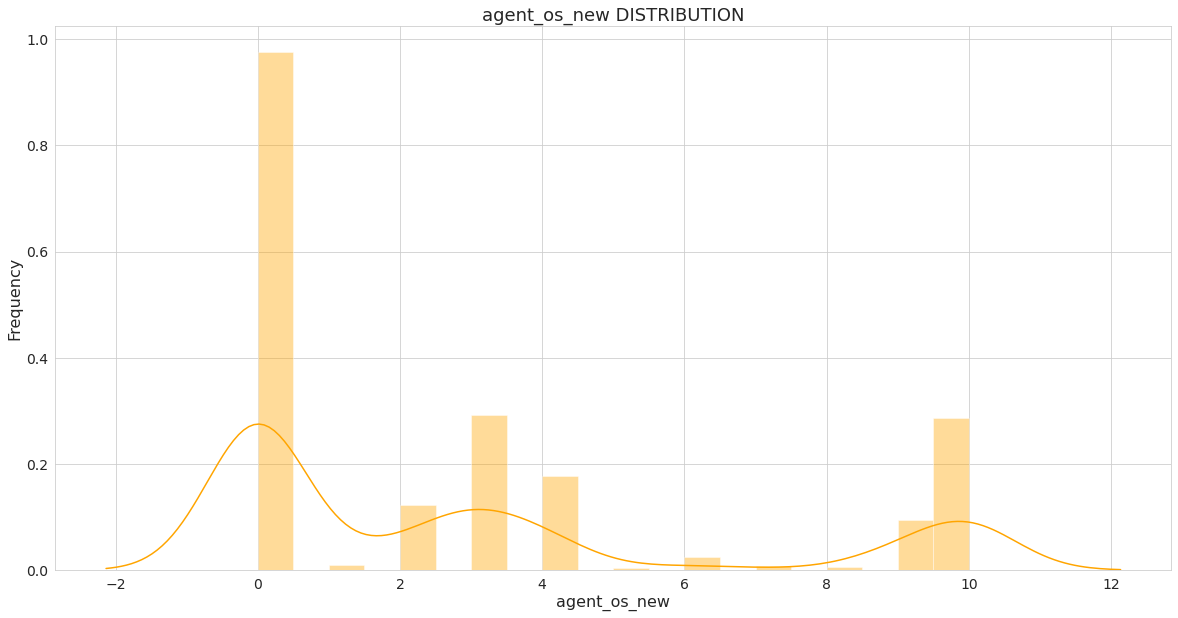

In [262]:
print(cl(df['agent_os_new'].describe(), attrs = ['bold']))

sb.distplot(df['agent_os_new'], 
            color = 'orange')
plt.title('agent_os_new DISTRIBUTION', 
          fontsize = 18)
plt.xlabel('agent_os_new', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('agent_os_new_distribution.png')
plt.show()

count    3688.000000
mean     0.681941   
std      0.465786   
min      0.000000   
25%      0.000000   
50%      1.000000   
75%      1.000000   
max      1.000000   
Name: agent_category_new, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


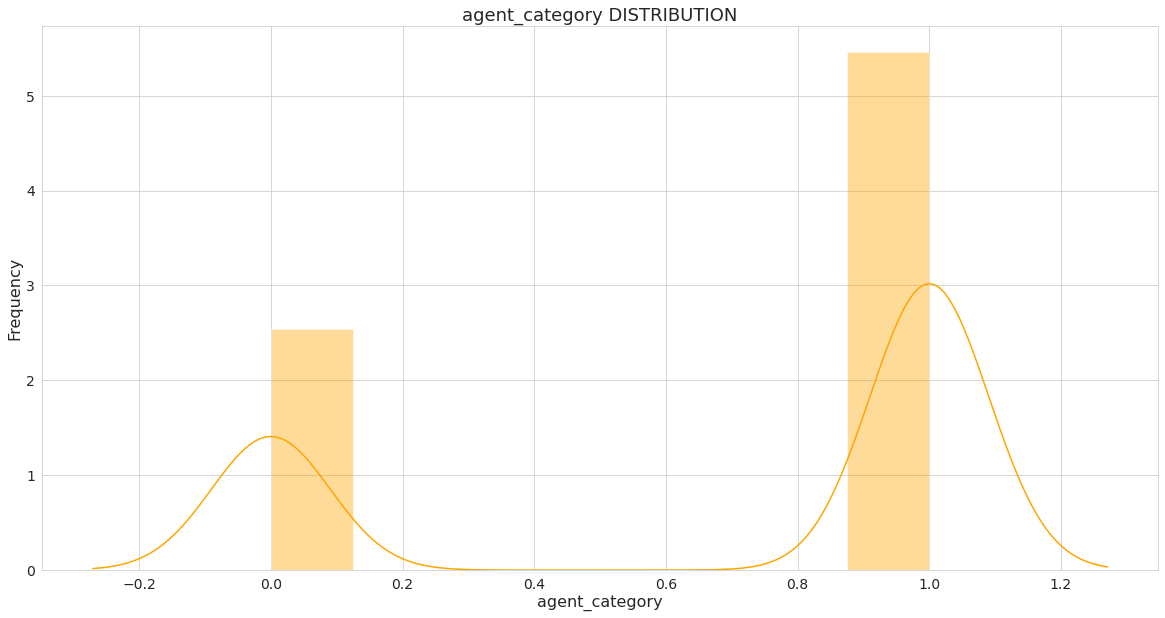

In [263]:
print(cl(df['agent_category_new'].describe(), attrs = ['bold']))

sb.distplot(df['agent_category_new'], 
            color = 'orange')
plt.title('agent_category DISTRIBUTION', 
          fontsize = 18)
plt.xlabel('agent_category', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('agent_category_distribution.png')
plt.show()

count    3688.000000
mean     79.586497  
std      110.198647 
min      0.000000   
25%      1.000000   
50%      1.000000   
75%      163.000000 
max      355.000000 
Name: referer_new, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


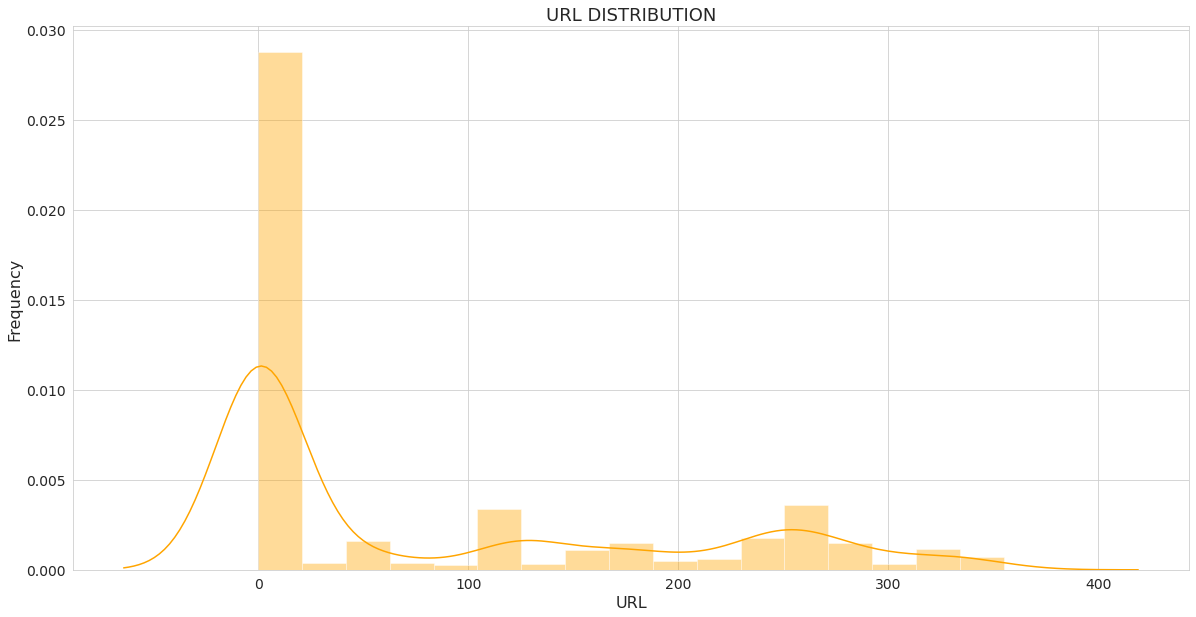

In [264]:
print(cl(df['referer_new'].describe(), attrs = ['bold']))

sb.distplot(df['referer_new'], 
            color = 'orange')
plt.title('URL DISTRIBUTION', 
          fontsize = 18)
plt.xlabel('URL', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('URL_distribution.png')
plt.show()

In [265]:
p= df.agent_os_new[df.cluster_num == 0]
p[:30]
df.agent_os[df.cluster_num == 0].apply(str)

2       Android
4       Android
12      Android
21      Android
24      Android
         ...   
3837    Android
3838    Android
3839    Android
3849    Android
3852    Android
Name: agent_os, Length: 628, dtype: object

In [266]:
df.head()

,remote,host,user,method,code,size,referer,http_x_forwarded_for,ua,created,agent_name,agent_category,agent_os,referer_known,uri,hostname,uri_url_hash,injected,enrich,event_tag,time,agent_os_new,agent_category_new,referer_new,agent_name_new,month,weekday,URL,cluster_num
0,62.308.59.153,-,-,GET,200,43,https://www.ecodibergamo.it/,155.380.27.200,"{'browser': {'family': 'Chrome', 'version': '78.0.3904.87', 'major_version': 78}, 'os': {'family': 'Windows', 'version': '10', 'major_version': 10}, 'device': 'Other'}",2019-11-08T00:00:00.000000000Z,Chrome,pc,Windows 10,False,"{'stm': '1573171199218', 'e': 'pv', 'url': 'https://www.ecodibergamo.it/', 'page': 'L'Eco di Bergamo - Notizie di Bergamo e provincia', 'refr': 'https://www.ecodibergamo.it/', 'tv': 'js-2.11.0', 'tna': 'cf', 'aid': 'SB-de77ae02-a351-11e7-879c-28cfe91d3e21', 'p': 'web', 'tz': 'Europe/Berlin', 'lang': 'it-IT', 'cs': 'UTF-8', 'f_pdf': '1', 'f_qt': '0', 'f_realp': '0', 'f_wma': '0', 'f_dir': '0', 'f_fla': '0', 'f_java': '0', 'f_gears': '0', 'f_ag': '0', 'res': '1280x720', 'cd': '24', 'cookie': '1', 'eid': 'fee489a9-c110-42b8-b997-ab50ddb1e912', 'dtm': '1573171199215', 'vp': '1280x616', 'ds': '1263x6725', 'vid': '2', 'sid': 'a3b7e1b0-6192-46ee-8f6b-e258fc2811ab', 'duid': '0c2841a0-ea61-445e-973e-607ea1123333', 'fp': '4272995877'}",7c6c8781197c,7e452fb177e15e229756b1fff4a6f5bc,"{'user': {'id': 'NDc5MjkwNTAwMDBwMG95aGRmMDlzbXN2aW10eWdtM3p0ZjBrMHl0ZTZycg==_test', 'profile': {'type': 'anonymous'}}}",{},53248f1721ee,2019-11-08T00:00:00Z,3.0,0.0,1.0,0.0,11,4,website,1
1,356.6.121.291,-,-,GET,200,43,https://www.ecodibergamo.it/,224.80.19.283,"{'browser': {'family': 'Firefox', 'version': '70.0', 'major_version': 70}, 'os': {'family': 'Windows', 'version': '10', 'major_version': 10}, 'device': 'Other'}",2019-11-08T00:00:02.000000000Z,Firefox,pc,Windows 10,False,"{'stm': '1573171202942', 'e': 'pv', 'url': 'https://www.ecodibergamo.it/', 'page': 'L'Eco di Bergamo - Notizie di Bergamo e provincia', 'tv': 'js-2.11.0', 'tna': 'cf', 'aid': 'SB-de77ae02-a351-11e7-879c-28cfe91d3e21', 'p': 'web', 'tz': 'Europe/Berlin', 'lang': 'it-IT', 'cs': 'UTF-8', 'f_pdf': '0', 'f_qt': '0', 'f_realp': '0', 'f_wma': '0', 'f_dir': '0', 'f_fla': '1', 'f_java': '0', 'f_gears': '0', 'f_ag': '0', 'res': '1680x1050', 'cd': '24', 'cookie': '1', 'eid': '52273f46-75ac-45d6-ad2b-26e8769ed3bf', 'dtm': '1573171202940', 'vp': '1680x908', 'ds': '1663x6737', 'vid': '1', 'sid': 'f35632aa-982f-4342-a86f-736d56b20797', 'duid': 'e7067c56-383b-4559-840f-70c193d3adf8', 'fp': '3175553694'}",7c6c8781197c,7e452fb177e15e229756b1fff4a6f5bc,"{'user': {'id': 'MjM2NzkxNjI4MTB0d2l6MWk1MXA1Mng4cXVvMm9ybHFjcXNtbGVya3VnNw==_test', 'profile': {'type': 'anonymous'}}}",{},53248f1721ee,2019-11-08T00:00:02Z,3.0,0.0,1.0,2.0,11,4,website,1
2,130.216.19.309,-,-,GET,200,43,https://www.ecodibergamo.it/stories/bergamo-citta/bergamo-nellolimpo-della-guida-rossada-vittorio-al-top-new-entry-impronte_1327138_11/,373.198.78.13,"{'browser': {'family': 'Chrome', 'version': '77.0.3865.116', 'major_version': 77}, 'os': {'family': 'Android', 'version': '4.4.4', 'major_version': 4}, 'device': 'Generic Smartphone'}",2019-11-08T00:00:02.000000000Z,Chrome,smartphone,Android,False,"{'stm': '1573171290396', 'e': 'pv', 'url': 'https://www.ecodibergamo.it/stories/bergamo-citta/bergamo-nellolimpo-della-guida-rossada-vittorio-al-top-new-entry-impronte_1327138_11/', 'page': 'Bergamo nell’Olimpo della Guida Rossa «Vittorio» al top, new entry «Impronte» - Bergamo città Bergamo', 'refr': 'android-app://com.google.android.googlequicksearchbox/https/www.google.com', 'tv': 'js-2.11.0', 'tna': 'cf', 'aid': 'SB-de77ae02-a351-11e7-879c-28cfe91d3e21', 'p': 'web', 'tz': 'Europe/Berlin', 'lang': 'it', 'cs': 'UTF-8', 'res': '800x1280', 'cd': '24', 'cookie': '1', 'eid': 'fc855c89-daf3-4c54-b0bf-06d7f41df16d', 'dtm': '1573171290376', 'vp': '800x1191', 'ds': '800x6819', 'vid': '1', 'sid': '473338c8-c941-48e2-8483-ec46e06e2728', 'duid': 'b2937acc-a384-4909-90b8-b5b4ce061e52', 'fp':

No handles with labels found to put in legend.


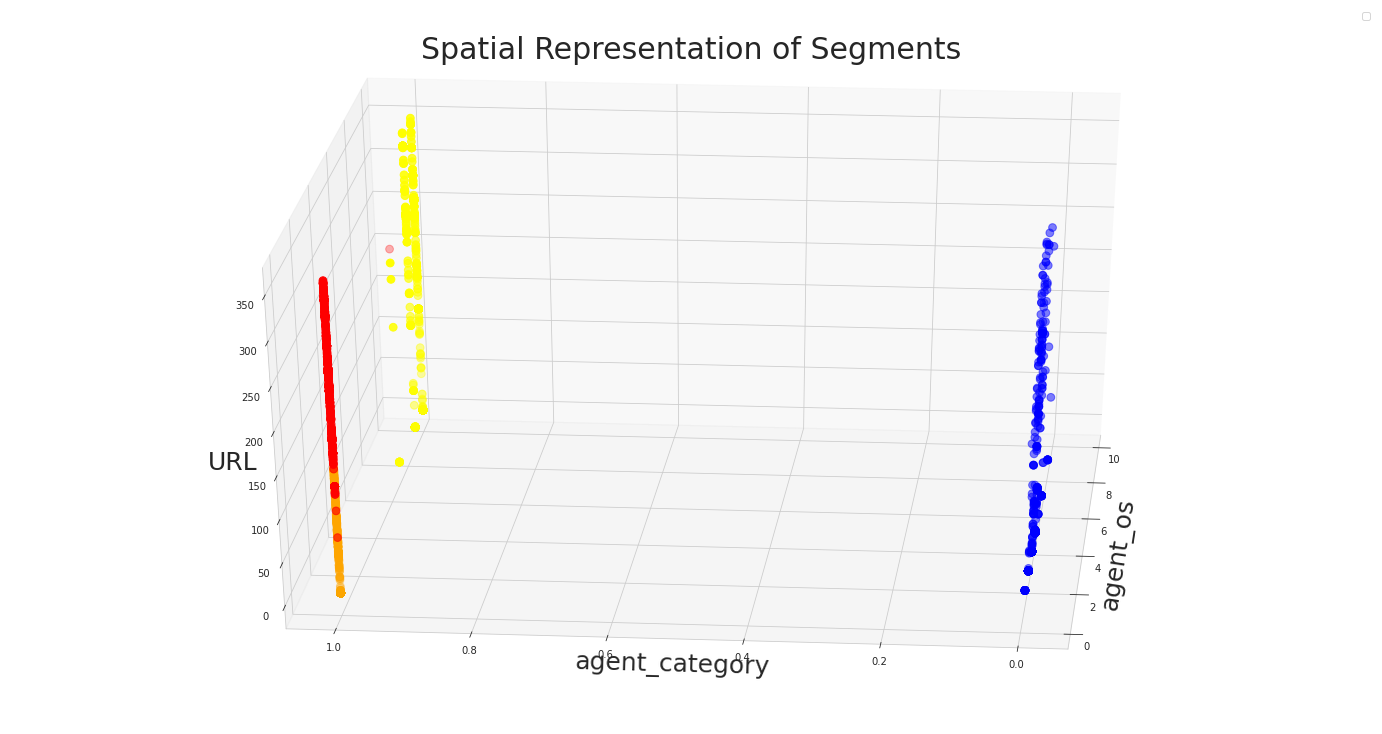

In [267]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(X)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

ax.scatter(df.agent_os_new[df.label == 0], df["agent_category_new"][df.label == 0], df["referer_new"][df.label == 0], c='blue', s=60, alpha = 0.5)
ax.scatter(df.agent_os_new[df.label == 1], df["agent_category_new"][df.label == 1], df["referer_new"][df.label == 1], c='red', s=60)
ax.scatter(df.agent_os_new[df.label == 2], df["agent_category_new"][df.label == 2], df["referer_new"][df.label == 2], c='yellow', s=60)
ax.scatter(df.agent_os_new[df.label == 3], df["agent_category_new"][df.label == 3], df["referer_new"][df.label == 3], c='orange', s=60)
ax.scatter(df.agent_os_new[df.label == 4], df["agent_category_new"][df.label == 4], df["referer_new"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)

plt.xlabel("agent_os", size = 25)
plt.ylabel("agent_category", size = 25)
ax.set_zlabel('URL', size = 25)
plt.legend()
ax.set_title('Spatial Representation of Segments', size=30)
plt.show()

In [229]:
df_new = XX.assign(Cluster =labels)
df_new

,agent_os_new,agent_category_new,referer_new,agent_name_new,Cluster
0,3.0,0.0,1.0,0.0,1
1,3.0,0.0,1.0,2.0,1
2,0.0,1.0,187.0,0.0,0
3,4.0,0.0,163.0,0.0,1
4,0.0,1.0,216.0,0.0,0
...,...,...,...,...,...
3852,0.0,1.0,233.0,0.0,0
3853,10.0,1.0,194.0,5.0,3
3854,10.0,1.0,95.0,5.0,3
3855,9.0,1.0,1.0,5.0,3


To get an impression of the clustering, we create a visualization with the method “tSNE”. t-Distributed Stochastic Neighbor Embedding (tSNE) is a technique for dimensionality reduction and is particularly well suited for the visualization of high-dimensional data sets.

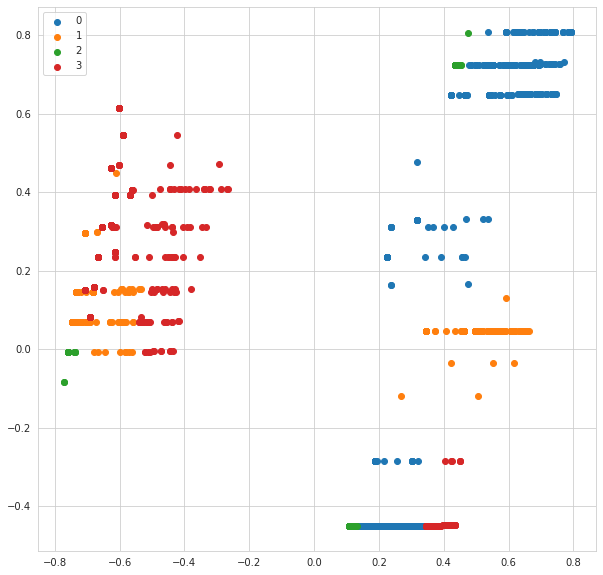

In [285]:
from sklearn.manifold import TSNE
import seaborn as sns

X_embedded = TSNE(n_components=2,random_state=42).fit_transform(X)
centers = np.array(kmeans.cluster_centers_)
model = KMeans(n_clusters = 4, init = "k-means++")
label = model.fit_predict(X_embedded)


plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#plt.scatter(centers[:,0], centers[:,1], marker="x", color='k',palette="Set1")
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

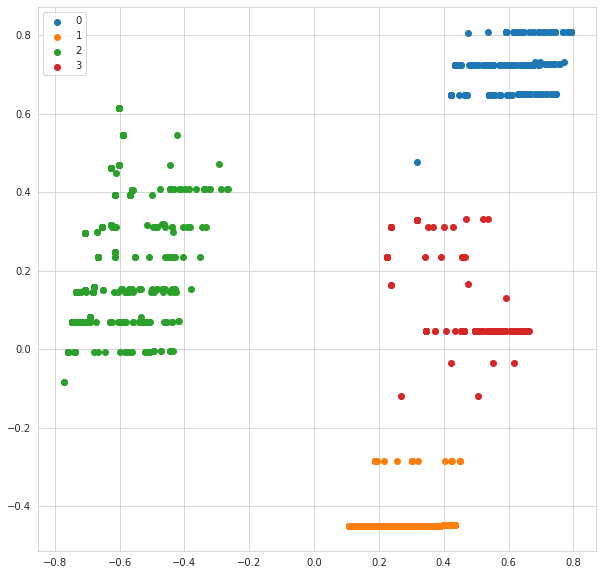

In [286]:
pca = PCA(n_components=2, random_state=42)
data = pca.fit_transform(X)

centers = np.array(kmeans.cluster_centers_)
model = KMeans(n_clusters = 4, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()
